# Tugas Praktikum

## Tugas
Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.
4. Buatlah  implementasi model SOM untuk segmentasi citra lain

## Nomor 1 — Menggunakan Data Mall_Customers.csv

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('../data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Eksplorasi Dataset

In [132]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [122]:
# Cek kolom null
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

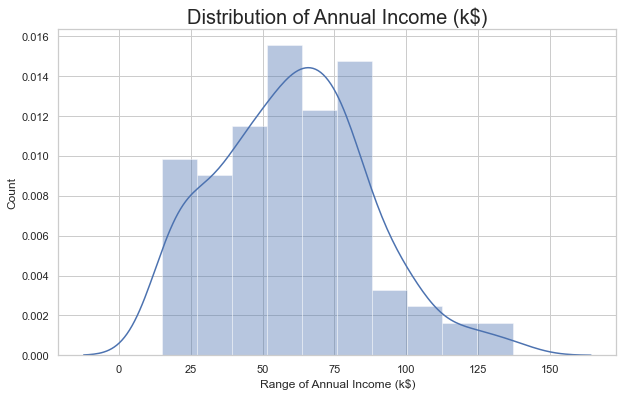

In [134]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

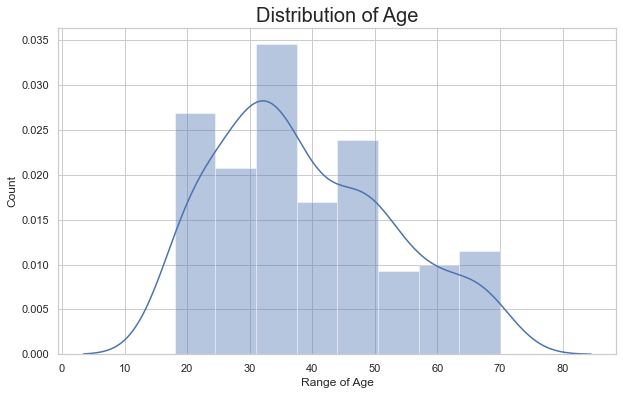

In [135]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

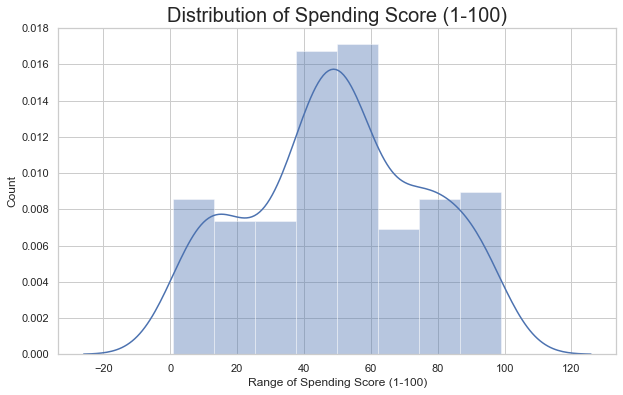

In [136]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

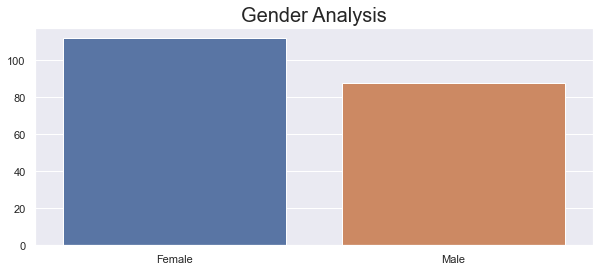

In [137]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.title('Gender Analysis', fontsize = 20)
plt.show()

## Encoding Fitur 'Gender'

In [124]:
from sklearn.calibration import LabelEncoder


labelencoder=LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])

In [125]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Nomor 2 — Clustering Fitur

In [126]:
# X = df.iloc[:, 3:5]
X=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [127]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Plot Data

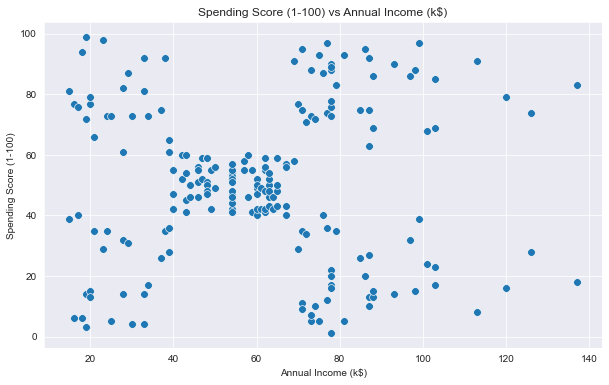

In [128]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

## Nomor 3 — Membuat Model KMeans

In [129]:
from sklearn.cluster import KMeans

In [130]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Implementasi Metode Elbow

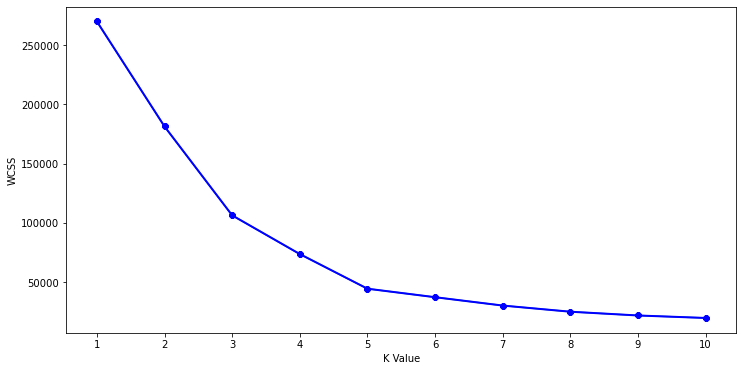

In [62]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Dari grafik yang ditunjukkan melalui implementasi metode elbow tersebut diketui bahwa sumbu x adalah jumlah cluster, dan sumbu y adalah nilai WCSS (Within-Cluster Sum of Squares Errors) untuk beberapa cluster yang berbeda. Terlihat bahwa di titik 5, nilai WCSS tiba-tiba berhenti berkurang dan terlihat bahwa setelah titik 5 penurunannya minimal, oleh karena itu 5 diambil sebagai jumlah cluster.

In [100]:
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df["label"] = y
#The new dataframe with the clustering done
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,1
1,2,1,21,15,81,4
2,3,0,20,16,6,1
3,4,0,23,16,77,4
4,5,0,31,17,40,1


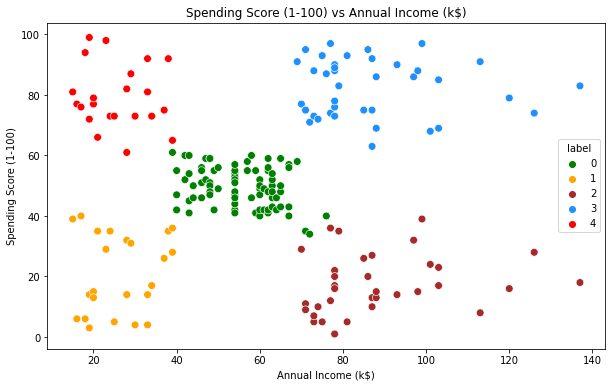

In [101]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full', data = df, s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

Dari dataset Mall_Customers telah terbentuk 5 cluster yang berbeda. Cluster kuning merupakan pelanggan yang memiliki skor pendapatan dan pengeluaran paling sedikit. Sedangkan cluster biru merupakan pelanggan dengan skor pendapatan dan pengeluaran terbanyak.

## Seleksi Fitur 

In [12]:

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [15]:
X.head()

,Gender,Age,Annual Income (k$)
0,1,19,15
1,1,21,15
2,0,20,16
3,0,23,16
4,0,31,17


In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X)

In [22]:
X_train_std

array([[ 1.12815215, -1.42456879, -1.73899919],
       [ 1.12815215, -1.28103541, -1.73899919],
       [-0.88640526, -1.3528021 , -1.70082976],
       [-0.88640526, -1.13750203, -1.70082976],
       [-0.88640526, -0.56336851, -1.66266033],
       [-0.88640526, -1.20926872, -1.66266033],
       [-0.88640526, -0.27630176, -1.62449091],
       [-0.88640526, -1.13750203, -1.62449091],
       [ 1.12815215,  1.80493225, -1.58632148],
       [-0.88640526, -0.6351352 , -1.58632148],
       [ 1.12815215,  2.02023231, -1.58632148],
       [-0.88640526, -0.27630176, -1.58632148],
       [-0.88640526,  1.37433211, -1.54815205],
       [-0.88640526, -1.06573534, -1.54815205],
       [ 1.12815215, -0.13276838, -1.54815205],
       [ 1.12815215, -1.20926872, -1.54815205],
       [-0.88640526, -0.27630176, -1.50998262],
       [ 1.12815215, -1.3528021 , -1.50998262],
       [ 1.12815215,  0.94373197, -1.43364376],
       [-0.88640526, -0.27630176, -1.43364376],
       [ 1.12815215, -0.27630176, -1.395

## Nomor 4 — Segmentasi Citra dengan Metode Self-Organizing Map (SOM)

In [106]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [107]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [108]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [109]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [110]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [111]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [112]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [113]:
# Load citra 
img_path = "../data/female.tiff"
img = io.imread(img_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

(-0.5, 255.5, 255.5, -0.5)

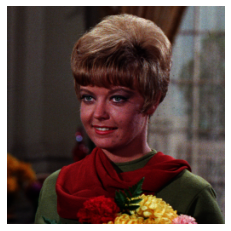

In [117]:
plt.imshow(img)
plt.axis('off')

In [114]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(img, num_epochs, initial_learning_rate, initial_neighborhood_radius)

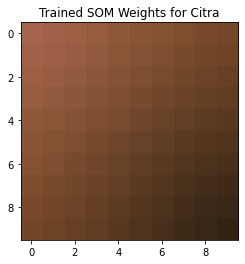

In [115]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Citra')
plt.show()